In [46]:
import numpy as np
import pandas as pd
import scipy.stats as scst
import matplotlib.pyplot as plt
import copy

### random_seed

In [37]:
SEED = 0

- data 

    - data is generated from a joint distribution $p(\mathbf{x}, y)$

    $$
    (\mathbf{x}, y) \sim p(\mathbf{x}, y)
    $$

    - whole data set

    $$
    D_{rs} = \{(\mathbf{x}_{i}, y_{i})|i = 1, \cdots, N = N_{r} + N_{s}\}
    $$

    - train data

    $$
    D_{r} = \{(\mathbf{x}_{i}, y_{i})|i = 1, \cdots, N_{r}\}
    $$

    - test data

    $$
    D_{s} = \{(\mathbf{x}_{i}, y_{i})|i = N_{r} + 1, \cdots, N_{r} + N_{s}\}
    $$

- fit model using the train data D_{r}

$$
\hat{y}_{D_{r}}
$$

- train error

$$
\begin{align}
E_{train} & = & \mathbb{E}_{D_{r}}[E(\hat{y}_{D_{r}}(\mathbf{x}), y)]\\
& = & \frac{1}{N_{r}}\sum^{N_{r}}_{i=1} E(\hat{y}_{D_{r}}(\mathbf{x}_{i}), y_{i})
\end{align}
$$

- test error

$$
\begin{align}
E_{test} & = & \mathbb{E}_{D_{s}}[E(\hat{y}_{D_{r}}(\mathbf{x}), y)]\\
& = & \frac{1}{N_{s}}\sum^{N_{r}+N_{s}}_{i=N_{r}+1} E(\hat{y}_{D_{r}}(\mathbf{x}_{i}), y_{i})
\end{align}
$$

- Expected generalization error

$$
\begin{align}
(\mathbf{x}_{\star}, y_{\star}) & \sim & p(\mathbf{x}, y)\\
E_{new} & = & \mathbb{E}_{\star}[E(\hat{y}_{D_{r}}(\mathbf{x}_{\star}), y_{\star})]
\end{align}
$$



- k-fold cross-validation

    - At the $l$th fold
    
        - train data : $D^{(l)}_{r}$
        - validation data : $D^{(l)}_{v} = D_{r} - D^{(l)}_{r}$

    - $l$th fold train error
    
    $$
    E^{(l)}_{train} = \mathbb{E}_{D^{(l)}_{r}}[E(\hat{y}_{D^{(l)}_{r}}(\mathbf{x}), y)]
    $$

    - $l$th fold validation error

    $$
    E^{(l)}_{val} = \mathbb{E}_{D^{(l)}_{v}}[E(\hat{y}_{D^{(l)}_{r}}(\mathbf{x}), y)]
    $$

- average trained model

$$
\hat{f}_{D_{r}}(\mathbf{x}) 
= \mathbb{E}_{l}
    \big[
        \hat{y}_{D^{(l)}_{r}}(\mathbf{x})
    \big]
= \frac{1}{k}\sum_{l=1}^{k} \hat{y}_{D^{(l)}_{r}}(\mathbf{x})
$$

- bias-variance decomposition of noise using $(\mathbf{x}, y) \in D^{(l)}_{v}$

$$
\begin{eqnarray}
\mathbb{E}_{l}\Big[
    \mathbb{E}_{(\mathbf{x}, y) \in D^{(l)}_{v}}\Big[
        \big(
            \hat{y}_{D^{(l)}_{r}}(\mathbf{x}) - y
        \big)^{2}
    \Big]
\Big]
& = &
\mathbb{E}_{l}\Big[
    \mathbb{E}_{(\mathbf{x}, y) \in D^{(l)}_{v}}\Big[
        \big(
            \hat{y}_{D^{(l)}_{r}}(\mathbf{x})
          - \hat{f}_{D_{r}}(\mathbf{x})
          + \hat{f}_{D_{r}}(\mathbf{x})
          - y
        \big)^{2}
    \Big]
\Big]\\
& = &
\mathbb{E}_{l}\Big[
    \mathbb{E}_{(\mathbf{x}, y) \in D^{(l)}_{v}}\Big[
        \big(
            \hat{y}_{D^{(l)}_{r}}(\mathbf{x})
          - \hat{f}_{D_{r}}(\mathbf{x})
        \big)^{2}
     \Big]
\Big]\\
&&
\qquad + 2
\mathbb{E}_{l}\Big[
    \mathbb{E}_{(\mathbf{x}, y) \in D^{(l)}_{v}}\Big[
        \big(
            \hat{y}_{D^{(l)}_{r}}(\mathbf{x})
          - \hat{f}_{D_{r}}(\mathbf{x})
        \big)
        \big(
            \hat{f}_{D_{r}}(\mathbf{x})
          - y
        \big)
     \Big]
\Big]\\
&&
\qquad +
\mathbb{E}_{l}\Big[
    \mathbb{E}_{(\mathbf{x}, y) \in D^{(l)}_{v}}\Big[
        \big(
            \hat{f}_{D_{r}}(\mathbf{x})
          - y
        \big)^{2}
     \Big]
\Big]
\end{eqnarray}
$$


- bias-variance decomposition of noise using $(\mathbf{x}, y) \in D_{s}$

$$
\begin{eqnarray}
\mathbb{E}_{l}\Big[
    \mathbb{E}_{(\mathbf{x}, y) \in D_{s}}\Big[
        \big(
            \hat{y}_{D^{(l)}_{r}}(\mathbf{x}) - y
        \big)^{2}
    \Big]
\Big]
& = &
\mathbb{E}_{l}\Big[
    \mathbb{E}_{(\mathbf{x}, y) \in D_{s}}\Big[
        \big(
            \hat{y}_{D^{(l)}_{r}}(\mathbf{x})
          - \hat{f}_{D_{r}}(\mathbf{x})
        \big)^{2}
    \Big]
\Big]\\
&&
\qquad +
\mathbb{E}_{(\mathbf{x}, y) \in D_{s}}\Big[
    \big(
        \hat{f}_{D_{r}}(\mathbf{x})
      - y
    \big)^{2}
\Big]
\end{eqnarray}
$$

### maybe the idiosyncratic noise is not uniform over x.
- true model

$$
y = f_{0}(\mathbf{x}) + \epsilon(\mathbf{x})
$$

### maybe the idiosyncratic noise is not even normal
### if one wants to estimate bias and variance at a specific point among test data 

### generate dataset

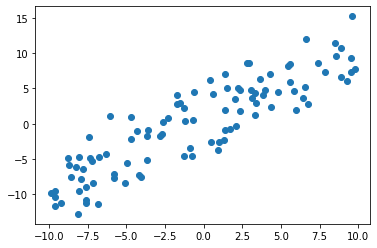

In [212]:
def generate_dataset(n, seed=SEED):
    np.random.seed(seed)
    xs = np.random.uniform(low=-10, high=10, size=n)
    err = np.random.normal(loc=0.0, scale=3.0, size=n)
    ys = xs + err
    return xs[:, np.newaxis], ys, err

n = 100
X, y, err = generate_dataset(n)
plt.scatter(X, y);

In [311]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

def perform_cv_with_val_bv(estimator, X_train, y_train, cv, seed):
    models = []
    y_preds = []
    trains = []
    vals = []
    kfold = KFold(n_splits=cv, random_state=seed).split(X_train, y_train)
    for k, (train, val) in enumerate(kfold):
        model = copy.deepcopy(estimator)
        model.fit(X_train[train], y_train[train])
        models.append(model)

        y_preds.append(model.predict(X_train))
        trains.append(train)
        vals.append(val)

    y_pred_mean = np.array(y_preds).mean(axis=0)

    errors = [
        [compute_ms(y_pred[train] - y_pred_mean[train]),
         2 * ((y_pred[train] - y_pred_mean[train]) * (y_pred_mean[train] - y_train[train])).mean(),
         compute_ms(y_pred_mean[train] - y_train[train]),
         compute_ms(y_pred[train] - y_train[train]),
         compute_ms(y_pred[val] - y_pred_mean[val]),
         2 * ((y_pred[val] - y_pred_mean[val]) * (y_pred_mean[val] - y_train[val])).mean(),
         compute_ms(y_pred_mean[val] - y_train[val]),
         compute_ms(y_pred[val] - y_train[val])]
        for y_pred, train, val in zip(y_preds, trains, vals)]

    return models, errors

def perform_cv_with_test_bv(estimator, X_train, y_train, X_test, y_test, cv, seed):
    models = []
    y_preds = []
    trains = []
    vals = []
    kfold = KFold(n_splits=cv, random_state=seed).split(X_train, y_train)
    for k, (train, _) in enumerate(kfold):
        model = copy.deepcopy(estimator)
        model.fit(X_train[train], y_train[train])
        models.append(model)

        y_preds.append(model.predict(X_test))

    y_pred_mean = np.array(y_preds).mean(axis=0)

    errors = [
        [compute_ms(y_pred - y_pred_mean),
         2 * ((y_pred - y_pred_mean) * (y_pred_mean - y_test)).mean(),
         compute_ms(y_pred_mean - y_test),
         compute_ms(y_pred - y_test)]
        for y_pred in y_preds]

    return models, errors

def compute_ms(x):
    return (x**2).mean()

In [265]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [333]:
cv = 10
seeds = list(range(1000))
data = []
alphas = np.power(10.0, np.arange(-4, 5, 1))
for alpha in alphas:
    estimator = Ridge(alpha=alpha)
    for seed in seeds:
        X_train, X_test, y_train, y_test =\
            train_test_split(X, y, test_size=0.20, random_state=seed)
        _, errors = perform_cv_with_test_bv(estimator, X_train, y_train, X_test, y_test, cv, seed)
        data.extend([[alpha, seed, k,
                      errs[0], errs[1], errs[2], errs[3]]
                      for k, errs in enumerate(errors)])

df_test_errors = pd.DataFrame(data, columns=["alpha", "seed", "fold", 
                                        "variance_test", "cross_test", "bias_test", "error_test"])
df_test_errors.head(3)

,alpha,seed,fold,variance_test,cross_test,bias_test,error_test
0,0.0001,0,0,0.016838,-0.175000,9.387787,9.229625
1,0.0001,0,1,0.020943,0.145854,9.387787,9.554584
2,0.0001,0,2,0.000168,0.027107,9.387787,9.415063


In [334]:
df_test_errors["sum"] = df_test_errors[["variance_test", "cross_test", "bias_test"]].sum(axis=1)
df_test_errors.head()

,alpha,seed,fold,variance_test,cross_test,bias_test,error_test,sum
0,0.0001,0,0,0.016838,-0.175000,9.387787,9.229625,9.229625
1,0.0001,0,1,0.020943,0.145854,9.387787,9.554584,9.554584
2,0.0001,0,2,0.000168,0.027107,9.387787,9.415063,9.415063
3,0.0001,0,3,0.042284,-0.240318,9.387787,9.189754,9.189754
4,0.0001,0,4,0.000059,0.004795,9.387787,9.392642,9.392642


In [336]:
tmp = df_test_errors.groupby(["alpha", "seed"])[["variance_test", "cross_test", "bias_test", "error_test"]].mean().reset_index()
tmp["sum"] = tmp[["variance_test", "cross_test", "bias_test"]].sum(axis=1)
tmp.head()

,alpha,seed,variance_test,cross_test,bias_test,error_test,sum
0,0.0001,0,0.036780,9.436896e-17,9.387787,9.424567,9.424567
1,0.0001,1,0.030727,4.288236e-16,9.224171,9.254898,9.254898
2,0.0001,2,0.022231,-3.441691e-16,9.339132,9.361363,9.361363
3,0.0001,3,0.026733,-1.076916e-15,9.744835,9.771568,9.771568
4,0.0001,4,0.035034,1.035283e-15,7.912976,7.948010,7.948010


In [349]:
tmp = tmp.groupby("alpha")[["variance_test", "cross_test", "bias_test", "error_test", "sum"]].mean().reset_index()
tmp["log_alpha"] = np.log10(tmp["alpha"])
tmp

,alpha,variance_test,cross_test,bias_test,error_test,sum,log_alpha
0,0.0001,0.024819,-6.551994e-18,9.261377,9.286195,9.286195,-4.0
1,0.0010,0.024819,-2.335650e-17,9.261377,9.286196,9.286196,-3.0
2,0.0100,0.024819,2.055000e-18,9.261377,9.286196,9.286196,-2.0
3,0.1000,0.024818,3.251528e-17,9.261384,9.286202,9.286202,-1.0
4,1.0000,0.024808,5.696181e-18,9.261457,9.286265,9.286265,0.0
5,10.0000,0.024714,1.155456e-17,9.262709,9.287423,9.287423,1.0
6,100.0000,0.023960,-1.881042e-17,9.323551,9.347511,9.347511,2.0
7,1000.0000,0.024384,2.019395e-17,12.257166,12.281550,12.281550,3.0
8,10000.0000,0.043157,1.962419e-17,31.124664,31.167821,31.167821,4.0


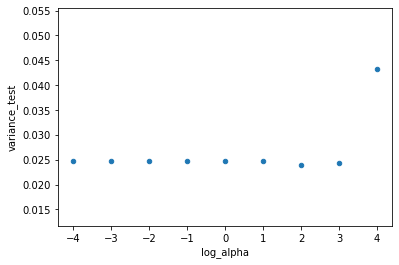

In [346]:
tmp.plot.scatter(x="log_alpha", y="variance_test")

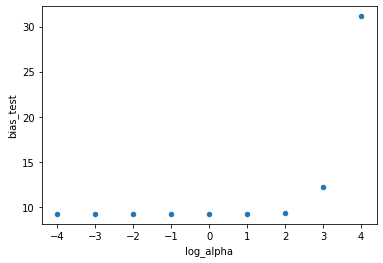

In [347]:
tmp.plot.scatter(x="log_alpha", y="bias_test")

In [348]:
tmp[tmp["error_test"] == tmp["error_test"].min()]

,alpha,variance_test,cross_test,bias_test,error_test,sum,log_alpha
0,0.0001,0.024819,-6.551994e-18,9.261377,9.286195,9.286195,-4.0


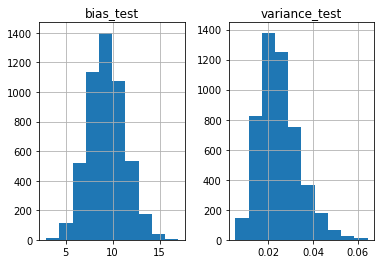

In [329]:
tmp[["variance_test", "bias_test"]].hist();

In [312]:
cv = 10
seeds = list(range(100))
data = []
alpha=1.0
estimator = Ridge(alpha=alpha)
for seed in seeds:
    X_train, X_test, y_train, y_test =\
        train_test_split(X, y, test_size=0.20, random_state=seed)
    _, errors = perform_cv_with_val_bv(estimator, X_train, y_train, cv, seed)
    data.extend([[alpha, seed, k,
                  errs[0], errs[1], errs[2], errs[3],
                  errs[4], errs[5], errs[6], errs[7]]
                  for k, errs in enumerate(errors)])

df_val_errors = pd.DataFrame(data, columns=["alpha", "seed", "fold", 
                                        "variance_train", "cross_train", "bias_train", "error_train",
                                        "variance_val", "cross_val","bias_val", "error_val"])
df_val_errors.head(3)

,alpha,seed,fold,variance_train,cross_train,bias_train,error_train,variance_val,cross_val,bias_val,error_val
0,1.0,0,0,0.011124,-0.022705,8.917765,8.906185,0.013083,0.199162,8.501191,8.713437
1,1.0,0,1,0.026642,-0.053869,8.780542,8.753315,0.021524,0.471227,9.736205,10.228955
2,1.0,0,2,0.000160,-0.000317,9.528003,9.527846,0.000157,0.002411,3.009055,3.011623


In [313]:
df_val_errors["sum_train"] = df_val_errors[["variance_train", "cross_train", "bias_train"]].sum(axis=1)
df_val_errors["sum_val"] = df_val_errors[["variance_val", "cross_val", "bias_val"]].sum(axis=1)
df_val_errors.head()

,alpha,seed,fold,variance_train,cross_train,bias_train,error_train,variance_val,cross_val,bias_val,error_val,sum_train,sum_val
0,1.0,0,0,0.011124,-0.022705,8.917765,8.906185,0.013083,0.199162,8.501191,8.713437,8.906185,8.713437
1,1.0,0,1,0.026642,-0.053869,8.780542,8.753315,0.021524,0.471227,9.736205,10.228955,8.753315,10.228955
2,1.0,0,2,0.000160,-0.000317,9.528003,9.527846,0.000157,0.002411,3.009055,3.011623,9.527846,3.011623
3,1.0,0,3,0.053291,-0.105833,8.741666,8.689123,0.059862,0.971624,10.086090,11.117576,8.689123,11.117576
4,1.0,0,4,0.000047,-0.000061,8.770058,8.770043,0.000043,0.001088,9.830562,9.831694,8.770043,9.831694


In [314]:
tmp = df_val_errors.groupby(["alpha", "seed"])[["variance_train", "cross_train", "bias_train", "error_train"]].mean().reset_index()
tmp["sum_train"] = tmp[["variance_train", "cross_train", "bias_train"]].sum(axis=1)
tmp.head()

,alpha,seed,variance_train,cross_train,bias_train,error_train,sum_train
0,1.0,0,0.031939,-0.063898,8.876108,8.844149,8.844149
1,1.0,1,0.031396,-0.062801,8.865063,8.833658,8.833658
2,1.0,2,0.020659,-0.041326,8.835777,8.815110,8.815110
3,1.0,3,0.026186,-0.052377,8.740749,8.714558,8.714558
4,1.0,4,0.031145,-0.062299,9.217087,9.185933,9.185933


In [315]:
tmp = df_val_errors.groupby(["alpha", "seed"])[["variance_val", "cross_val", "bias_val", "error_val"]].mean().reset_index()
tmp["sum_val"] = tmp[["variance_val", "cross_val", "bias_val"]].sum(axis=1)
tmp.head()

,alpha,seed,variance_val,cross_val,bias_val,error_val,sum_val
0,1.0,0,0.033274,0.575081,8.876108,9.484464,9.484464
1,1.0,1,0.037575,0.565211,8.865063,9.467849,9.467849
2,1.0,2,0.024289,0.371936,8.835777,9.232002,9.232002
3,1.0,3,0.029754,0.471394,8.740749,9.241897,9.241897
4,1.0,4,0.038261,0.560688,9.217087,9.816037,9.816037


In [282]:
df_val_errors["error_val"].mean()

9.311534190451166

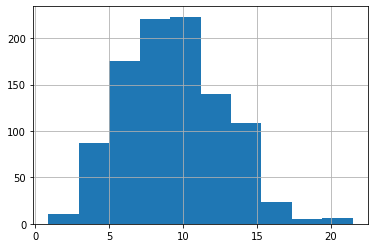

In [283]:
df_val_errors["error_val"].hist()

In [260]:
df_errors.groupby(["alpha", "seed"])[["variance_val", "bias_val", "error_val"]].sum()

variance_val    bias_val   error_val
alpha seed                                      
1.0   0         2.661925  710.088641  758.757087
      1         3.005965  709.205063  757.427894
      2         1.943145  706.862156  738.560179
      3         2.380358  699.259893  739.351732
      4         3.060907  737.366998  785.282926
      5         1.140786  724.426555  745.122129
      6         2.230676  656.065319  694.623819
      7         2.868363  740.722128  786.985730
      8         1.177401  683.716193  706.608822
      9         1.704735  664.945603  695.716278

In [223]:
df_errors = pd.DataFrame(data, columns=["alpha", "seed", "errors",
                                        "variance_train", "variance_val",
                                        "bias_train", "bias_val"])
df_errors.head(3)

AssertionError: 7 columns passed, passed data had 4 columns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

def perform_cv_with_val(estimator, X_train, y_train, cv, seed):
    models = []
    errors = []
    kfold = KFold(n_splits=cv, random_state=seed).split(X_train, y_train)
    for k, (train, val) in enumerate(kfold):
        model = copy.deepcopy(estimator)
        model.fit(X_train[train], y_train[train])
        y_pred = model.predict(X_train[val])
        error = compute_ms(y_pred - y_train[val])
        models.append(model)
        errors.append(error)
    return models, errors

def perform_cv_with_test(estimator, X_train, y_train, X_test, y_test, cv, seed):
    models = []
    errors = []
    kfold = KFold(n_splits=cv, random_state=seed).split(X_train, y_train)
    for k, (train, _) in enumerate(kfold):
        model = copy.deepcopy(estimator)
        model.fit(X_train[train], y_train[train])
        y_pred = model.predict(X_test)
        error = compute_ms(y_pred - y_test)
        models.append(model)
        errors.append(error)
    return models, errors

def perform_cv_with_val_bv(estimator, X_train, y_train, cv, seed):
    models = []
    y_preds = []
    trains = []
    vals = []
    kfold = KFold(n_splits=cv, random_state=seed).split(X_train, y_train)
    for k, (train, val) in enumerate(kfold):
        model = copy.deepcopy(estimator)
        model.fit(X_train[train], y_train[train])
        models.append(model)

        y_preds.append(model.predict(X_train))
        trains.append(train)
        vals.append(val)

    y_pred_mean = np.array(y_preds).mean(axis=0)
    print(y_pred_mean)

    errors = [
        [compute_ms(y_pred[train] - y_pred_mean[train]),
         compute_ms(y_pred_mean[train] - y_train[train]),
         compute_ms(y_pred[train] - y_train[train]),
         compute_ms(y_pred[val] - y_pred_mean[val]),
         compute_ms(y_pred_mean[val] - y_train[val]),
         compute_ms(y_pred[val] - y_train[val])]
        for y_pred, train, val in zip(y_preds, trains, vals)]

    return models, errors

def compute_average_model():
    pass

def compute_ms(x):
    return (x**2).sum()

def compute_bias(X):
    pass

def compute_variance(X):
    pass




In [222]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

cv = 10
seeds = list(range(100))
alphas = np.power(10.0, np.arange(-4, 5, 1))
data = []
for alpha in alphas:
    estimator = Ridge(alpha=alpha)
    for seed in seeds:
        X_train, X_test, y_train, y_test =\
            train_test_split(X, y, test_size=0.20, random_state=seed)
        _, errors_val = perform_cv_with_val(estimator, X_train, y_train, cv, seed)
        _, errors_test = perform_cv_with_test(estimator, X_train, y_train, X_test, y_test, cv, seed)
        data.append([alpha,
                     seed,
                     np.sqrt(np.mean(errors_val)),
                     np.sqrt(np.mean(errors_test))])

df_errors = pd.DataFrame(data, columns=["alpha", "seed", "errors_val", "errors_test"])
df_errors.head(3)

AssertionError: 7 columns passed, passed data had 4 columns

In [ ]:
df_errors

In [215]:
df_errors.groupby("alpha")[["errors_val", "errors_test"]].mean()

,errors_val,errors_test
alpha,,
0.0001,3.050378,3.061412
0.0010,3.050378,3.061412
0.0100,3.050378,3.061412
0.1000,3.050376,3.061409
1.0000,3.050358,3.061376
10.0000,3.050269,3.061132
100.0000,3.057481,3.066377
1000.0000,3.490812,3.471954
10000.0000,5.567208,5.509681


In [216]:
df_errors.groupby("alpha")[["errors_val", "errors_test"]].std()

,errors_val,errors_test
alpha,,
0.0001,0.083185,0.322193
0.0010,0.083185,0.322193
0.0100,0.083185,0.322194
0.1000,0.083185,0.322203
1.0000,0.083183,0.322297
10.0000,0.083160,0.323271
100.0000,0.082845,0.335671
1000.0000,0.079565,0.490314
10000.0000,0.135778,0.702408


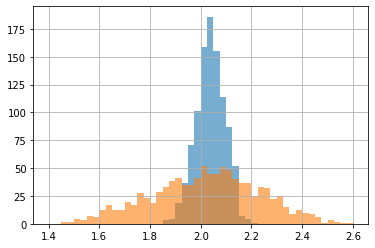

In [172]:
df_errors["errors_val"].hist(bins=np.arange(1.4, 2.6, 0.025), alpha=0.6);
df_errors["errors_test"].hist(bins=np.arange(1.4, 2.6, 0.025), alpha=0.6);

In [173]:
df_errors["errors_val"].mean()

2.0387160474448693

In [174]:
df_errors["errors_test"].mean()

2.0201136163687567

In [91]:
estimator = LinearRegression()
cv = 10
models, errors = cross_val_score(estimator=estimator, X=X_train, y=y_train, cv=cv)

In [111]:
y_test_pred = np.zeros((cv, X_test.shape[0]))
for i in range(cv):
    y_test_pred[i, :] = models[i].predict(X_test)
    
y_test_pred_mean = y_test_pred.mean(axis=0)
bmn = np.sqrt(((y_test_pred - y_test_pred_mean) ** 2).ravel().mean())
bsd = np.sqrt(((y_test_pred - y_test_pred_mean) ** 2).ravel().std())
print(bmn, bsd)

0.12785337777769584 0.1739651484451831


In [102]:
np.linalg.norm(y_test - y_test_pred_mean) / np.sqrt(len(y_test_pred_mean))

2.042633081382802

In [110]:
vmn = np.sqrt(((y_test_pred_mean - X_test.ravel())**2).mean())
vsd = np.sqrt(((y_test_pred_mean - X_test.ravel())**2).std())
print(vmn, vsd)

0.5485294668243403 0.28491681321679296


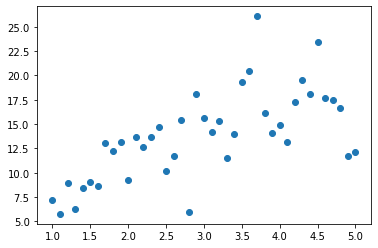

In [132]:
x = np.linspace(1, 5, 41)
sgms = x.copy()
y = 5 + 3 * x + np.random.normal(loc=0, scale=sgms, size=len(sgms))
plt.scatter(x, y);

In [121]:
np.linspace(1, 5, 41)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. ])

In [51]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
model.coef_

array([0.9936935])

In [55]:
model.intercept_

0.3812371762964972

In [63]:
np.sqrt(((model.predict(X) - y) ** 2).mean())

1.9924243009205125

In [ ]:
model.

In [53]:
model.score(X, y)

0.8921228838344973

In [ ]:

- cv estimate of variance at $(\mathbf{x}, y) \in D^{(l)}_{v}$

$$
\mathbb{E}_{l}\Big[
    \mathbb{E}_{D^{(l)}_{v}}\Big[
        \big(
            \hat{y}_{D^{(l)}_{r}}(\mathbf{x}) - \hat{f}_{D_{r}}(\mathbf{x})
        \big)^{2}
    \Big]
\Big]
$$

- cv estimate of bias$^{2}$ + noise at $(\mathbf{x}, y)$

$$
\mathbb{E}_{l}\Big[
    \mathbb{E}_{D^{(l)}_{v}}\Big[
        \big(
            \hat{f}_{D_{r}}(\mathbf{x}) - y
        \big)^{2}
    \Big]
\Big]
,
\quad
(\mathbf{x}, y) \in D^{(l)}_{v}
$$


- cv estimate of variance at $(\mathbf{x}, y)$

$$
\mathbb{E}_{l}\Big[
    \mathbb{E}_{D^{(l)}_{v}}\Big[
        \mathbb{E}_{D^{(l)}_{r}}\big[
            \big(
                \hat{y}_{D^{(l)}_{r}}(\mathbf{x}) - \hat{f}_{D_{r}}(\mathbf{x})
            \big)^{2}
        \big]
    \Big]
\Big]
,
\quad
(\mathbf{x}, y) \in D^{(l)}_{v}
$$

- cv estimate of bias$^{2}$ + noise at $(\mathbf{x}, y)$

$$
\mathbb{E}_{l}\Big[
    \mathbb{E}_{D^{(l)}_{v}}\Big[
        \big(
            \hat{f}_{D_{r}}(\mathbf{x}) - y
        \big)^{2}
    \Big]
\Big]
,
\quad
(\mathbf{x}, y) \in D^{(l)}_{v}
$$


- assume true model

$$
y = f_{0}(x) + \epsilon
,\quad
\epsilon \sim Normal(0, \sigma^{2})
$$






In [49]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=LinearRegression(),
                         X=X_train,
                         y=y_train,
                         cv=5,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.8215902  0.90934747 0.8671446  0.91629116 0.77906875]
CV accuracy: 0.859 +/- 0.052


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state=1,
                                           solver='lbfgs', max_iter=10000))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
# plt.savefig('images/06_05.png', dpi=300)
plt.show()

In [112]:
from sklearn.preprocessing import PolynomialFeatures

In [113]:
pf = PolynomialFeatures(4)

In [117]:
pf.fit_transform(X[:,0]).shape

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.97627008  4.30378733  2.05526752  0.89766366 -1.52690401  2.91788226
 -1.24825577  7.83546002  9.27325521 -2.33116962  5.83450076  0.5778984
  1.36089122  8.51193277 -8.57927884 -8.25741401 -9.59563205  6.65239691
  5.56313502  7.40024296  9.57236684  5.98317128 -0.77041275  5.61058353
 -7.63451148  2.79842043 -7.13293425  8.89337834  0.43696644 -1.7067612
 -4.70888776  5.48467379 -0.87699336  1.36867898 -9.62420399  2.35270994
  2.24191445  2.33867994  8.87496157  3.63640598 -2.80984199 -1.25936092
  3.95262392 -8.79549057  3.33533431  3.41275739 -5.79234878 -7.42147405
 -3.69143298 -2.72578458  1.40393541 -1.22796973  9.76747676 -7.95910379
 -5.82246488 -6.77380964  3.06216651 -4.93416795 -0.67378454 -5.11148816
 -6.82060833 -7.79249718  3.12659179 -7.23634097 -6.06835277 -2.62549659
  6.4198646  -8.05797448  6.75889815 -8.07803184  9.5291893  -0.62697597
  9.53522176  2.09691039  4.78527159 -9.21624415 -4.34386075 -7.59606878
 -4.07719605 -7.62544562 -3.64033641 -1.71474011 -8.71705007  3.84944239
  1.33202908 -4.69221018  0.46496107 -8.12118978  1.51892991  8.58592395
 -3.62862095  3.3482076  -7.36404275  4.32654408 -4.21187814 -6.33617276
  1.7302587  -9.59784908  6.57880058 -9.90609048].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.